In [1]:
%load_ext lab_black
import pandas as pd

df = pd.read_hdf("../data/observations.hdf", "key")
df.obs_rarity = df.obs_rarity.clip(1, 1)
df = df.groupby(["BU_NAAM", "year"]).sum()
df = df[df.obs_rarity > 0].sort_values("year")
df = df.obs_rarity.unstack("year")

df_norm = df / df.sum()
df_norm = df_norm.T

df_norm_wijk = df.T / df.T.mean()

df_evi = pd.read_csv("../data/satdata/evi.csv", index_col=0)
df_evi["year"] = df_evi.index.str.slice(0, 4)
df_evi_year = df_evi.groupby(df_evi.year).mean()
df_evi_year.index = df_evi_year.index.astype(int)
df_evi_year_change = df_evi_year.ffill().pct_change()

In [2]:
# heel lelijk
res = []
for (
    year,
    row,
) in (
    df.T.iterrows()
):  # itereer over df_norm (normalized per year (/ sum year)) of over df.T
    for wijk in row.keys():
        try:
            evi_val = df_evi_year.loc[int(year)][wijk]
        except Exception:
            continue
        res.append({"year": year, "wijk": wijk, "obs": row[wijk], "evi": evi_val})
df_res = pd.DataFrame(res)
df_res.head()

,year,wijk,obs,evi
0,2000,Bavel,1.0,3122.723835
1,2000,Belcrum,3.0,1568.098235
2,2000,Biesdonk,NaN,2401.087402
3,2000,Blauwe Kei,3.0,2229.858621
4,2000,Boeimeer,6.0,2437.546134


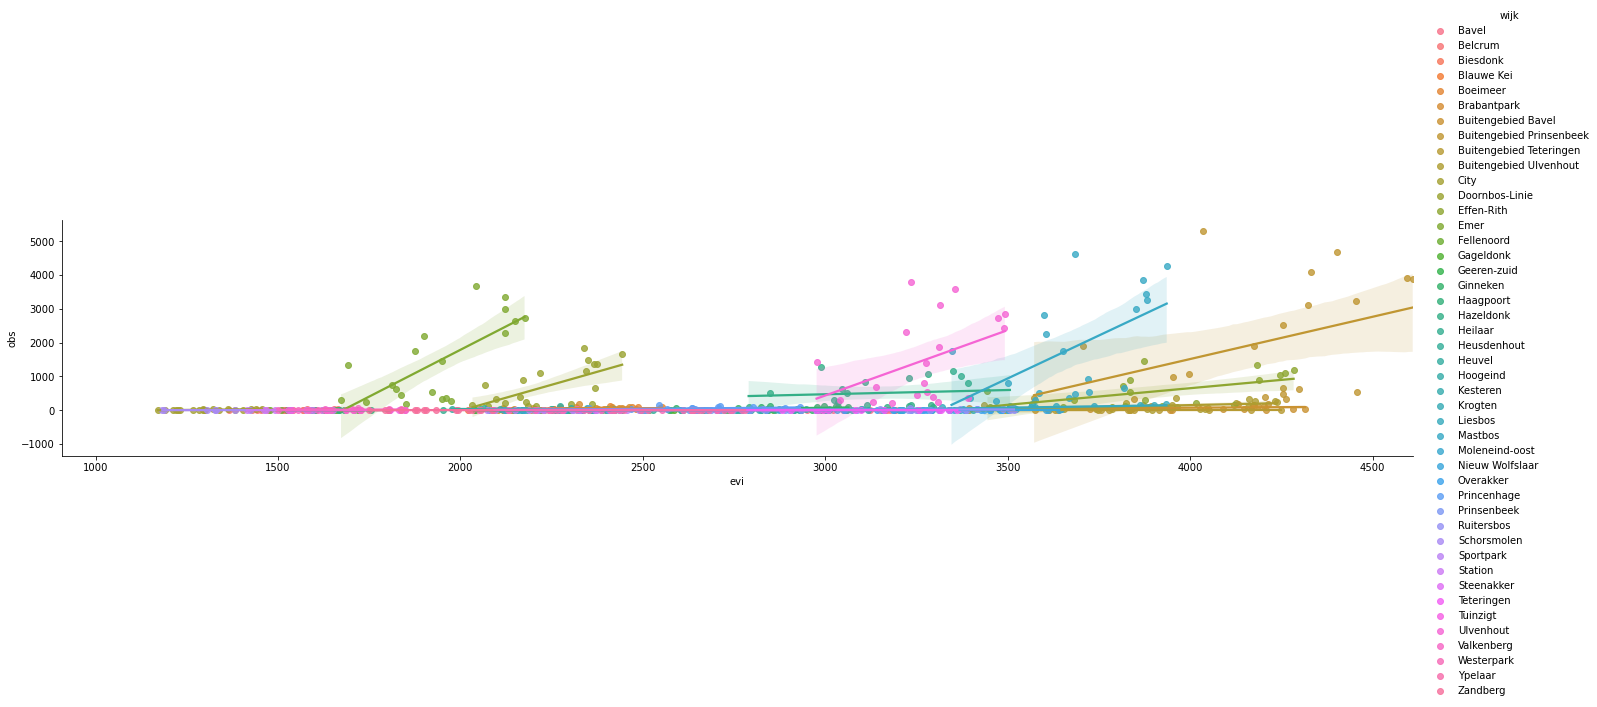

In [5]:
import seaborn as sns

sns.lmplot("evi", "obs", data=df_res, hue="wijk", height=4, aspect=5)

In [130]:
df_res.obs.groupby(pd.qcut(df_res.evi, 4)).mean()

evi
(1084.484, 2116.641]    106.025000
(2116.641, 2465.011]    183.425000
(2465.011, 3185.506]     58.331522
(3185.506, 4609.955]    584.608295
Name: obs, dtype: float64

In [131]:
df_res.obs.describe()

count     721.000000
mean      255.069348
std       720.296643
min         1.000000
25%         3.000000
50%        10.000000
75%        87.000000
max      5306.000000
Name: obs, dtype: float64

In [132]:
from statsmodels.formula.api import ols

df_res["evi_sq"] = df_res.evi ** 2
fit = ols("obs ~ evi + C(wijk) + C(year) ", data=df_res).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     18.70
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          8.92e-110
Time:                        15:09:25   Log-Likelihood:                -5392.2
No. Observations:                 721   AIC:                         1.091e+04
Df Residuals:                     656   BIC:                         1.121e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -2370.9633    574.909     -4.124      0.000   -3499.846   -1242.080
C(wijk)[T.Belcrum]                   1089.5262    306.044      3.560      0.000     488.583    1690.469
C(wijk)[T.Biesdonk]                   490.8588    323.425      1.518      0.130    -144.215    1125.932
C(wijk)[T.Blauwe Kei]                 583.9280    220.019      2.654      0.008     151.901    1015.955
C(wijk)[T.Boeimeer]                   574.1069    196.058      2.928      0.004     189.130     959.083
C(wijk)[T.Brabantpark]                631.6813    203.180      3.109      0.002     232.720    1030.643
C(wijk)[T.Buitengebied Bavel]        -520.4214    227.378     -2.289      0.022    -966.898     -73.944
C(wijk)[T.Buitengebied Prinsenbeek]  1288.6876    253.293      5.088      0.000     791.324    1786.051
C(wijk)[T.Buitengebied Teteringen]   -482.4349    203.226     -2.374      0.018    -881.488     -83.382
C(wijk)[T.Buitengebied Ulvenhout]    -417.4648    220.031     -1.897      0.058    -849.514      14.584
C(wijk)[T.City]                      1254.0938    343.202      3.654      0.000     580.186    1928.001
C(wijk)[T.Doornbos-Linie]            1325.0840    208.092      6.368      0.000     916.478    1733.690
C(wijk)[T.Effen-Rith]                  36.1648    214.718      0.168      0.866    -385.453     457.783
C(wijk)[T.Emer]                      2237.3168    248.212      9.014      0.000    1749.930    2724.704
C(wijk)[T.Fellenoord]                 939.2124    312.281      3.008      0.003     326.021    1552.404
C(wijk)[T.Gageldonk]                  314.5072    174.429      1.803      0.072     -27.999     657.014
C(wijk)[T.Geeren-zuid]                516.2657    237.988      2.169      0.030      48.955     983.576
C(wijk)[T.Ginneken]                   239.7228    154.694      1.550      0.122     -64.032     543.477
C(wijk)[T.Haagpoort]                 1030.0355    297.978      3.457      0.001     444.931    1615.140
C(wijk)[T.Hazeldonk]                  490.0736    152.359      3.217      0.001     190.904     789.243
C(wijk)[T.Heilaar]                    550.0322    203.218      2.707      0.007     150.997     949.068
C(wijk)[T.Heusdenhout]                251.8115    158.450      1.589      0.112     -59.319     562.942
C(wijk)[T.Heuvel]                     632.4075    207.147      3.053      0.002     225.656    1039.159
C(wijk)[T.Hoogeind]                    29.5873    152.743      0.194      0.846    -270.336     329.511
C(wijk)[T.Kesteren]                   259.9754    355.844      0.731      0.465    -438.755     958.705
C(wijk)[T.Krogten]                    168.9785    294.753      0.573      0.567    -409.794     747.751
C(wijk)[T.Liesbos]                   -203.9548    175.648     -1.16

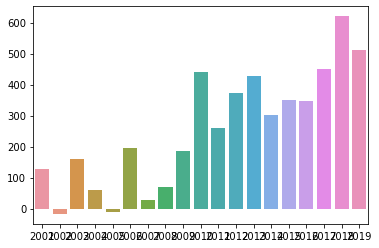

In [157]:
coefs = pd.Series(fit.params)
coefs_years = coefs[coefs.index.str.contains("year")]
years = coefs_years.index
years = [y.split(".")[1].replace("]", "") for y in years]
sns.barplot(years, coefs_years.values)

In [ ]:
coefs = pd.Series(fit.params)
coefs_wijken = coefs[coefs.index.str.contains("wijk")]
wijken = coefs_wijken.index
wijken = [y.split("T.")[1].replace("]", "") for y in wijken]
sns.barplot(wijken, coefs_wijken.values)

In [ ]:
wijken

In [ ]:
fit = ols("obs ~ evi + C(wijk)  + C(year)", data=df_res).fit()
fit.summary()

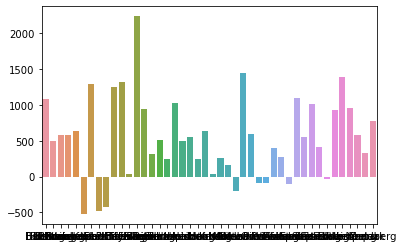

In [162]:
fit = ols("obs ~ evi + C(wijk)  + C(year)", data=df_res).fit()
fit.summary()

In [161]:
wijken

Index(['Intercept', 'C(wijk)[T.Belcrum]', 'C(wijk)[T.Biesdonk]',
       'C(wijk)[T.Blauwe Kei]', 'C(wijk)[T.Boeimeer]',
       'C(wijk)[T.Brabantpark]', 'C(wijk)[T.Buitengebied Bavel]',
       'C(wijk)[T.Buitengebied Prinsenbeek]',
       'C(wijk)[T.Buitengebied Teteringen]',
       'C(wijk)[T.Buitengebied Ulvenhout]', 'C(wijk)[T.City]',
       'C(wijk)[T.Doornbos-Linie]', 'C(wijk)[T.Effen-Rith]', 'C(wijk)[T.Emer]',
       'C(wijk)[T.Fellenoord]', 'C(wijk)[T.Gageldonk]',
       'C(wijk)[T.Geeren-zuid]', 'C(wijk)[T.Ginneken]', 'C(wijk)[T.Haagpoort]',
       'C(wijk)[T.Hazeldonk]', 'C(wijk)[T.Heilaar]', 'C(wijk)[T.Heusdenhout]',
       'C(wijk)[T.Heuvel]', 'C(wijk)[T.Hoogeind]', 'C(wijk)[T.Kesteren]',
       'C(wijk)[T.Krogten]', 'C(wijk)[T.Liesbos]', 'C(wijk)[T.Mastbos]',
       'C(wijk)[T.Moleneind-oost]', 'C(wijk)[T.Nieuw Wolfslaar]',
       'C(wijk)[T.Overakker]', 'C(wijk)[T.Princenhage]',
       'C(wijk)[T.Prinsenbeek]', 'C(wijk)[T.Ruitersbos]',
       'C(wijk)[T.Schorsmolen]', 'C(w

In [77]:
fit = ols("obs ~ evi + C(wijk)  + C(year)", data=df_res).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2836.
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:58:04   Log-Likelihood:                 3058.9
No. Observations:                 721   AIC:                            -5988.
Df Residuals:                     656   BIC:                            -5690.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0083      0.005     -1.775      0.076      -0.017       0.001
C(wijk)[T.Belcrum]                      0.0049      0.002      1.984      0.048    5.03e-05       0.010
C(wijk)[T.Biesdonk]                     0.0021      0.003      0.785      0.433      -0.003       0.007
C(wijk)[T.Blauwe Kei]                   0.0023      0.002      1.265      0.206      -0.001       0.006
C(wijk)[T.Boeimeer]                     0.0054      0.002      3.420      0.001       0.002       0.009
C(wijk)[T.Brabantpark]                  0.0074      0.002      4.490      0.000       0.004       0.011
C(wijk)[T.Buitengebied Bavel]           0.0053      0.002      2.892      0.004       0.002       0.009
C(wijk)[T.Buitengebied Prinsenbeek]     0.2126      0.002    103.391      0.000       0.209       0.217
C(wijk)[T.Buitengebied Teteringen]     -0.0020      0.002     -1.182      0.238      -0.005       0.001
C(wijk)[T.Buitengebied Ulvenhout]       0.0127      0.002      7.110      0.000       0.009       0.016
C(wijk)[T.City]                         0.0055      0.003      1.981      0.048    4.93e-05       0.011
C(wijk)[T.Doornbos-Linie]               0.0798      0.002     47.242      0.000       0.076       0.083
C(wijk)[T.Effen-Rith]                   0.0570      0.002     32.686      0.000       0.054       0.060
C(wijk)[T.Emer]                         0.1560      0.002     77.410      0.000       0.152       0.160
C(wijk)[T.Fellenoord]                   0.0037      0.003      1.461      0.144      -0.001       0.009
C(wijk)[T.Gageldonk]                    0.0014      0.001      0.986      0.325      -0.001       0.004
C(wijk)[T.Geeren-zuid]                  0.0017      0.002      0.865      0.387      -0.002       0.005
C(wijk)[T.Ginneken]                     0.0055      0.001      4.350      0.000       0.003       0.008
C(wijk)[T.Haagpoort]                    0.0036      0.002      1.473      0.141      -0.001       0.008
C(wijk)[T.Hazeldonk]                    0.0552      0.001     44.608      0.000       0.053       0.058
C(wijk)[T.Heilaar]                      0.0026      0.002      1.550      0.122      -0.001       0.006
C(wijk)[T.Heusdenhout]                  0.0018      0.001      1.384      0.167      -0.001       0.004
C(wijk)[T.Heuvel]                       0.0048      0.002      2.881      0.004       0.002       0.008
C(wijk)[T.Hoogeind]                     0.0010      0.001      0.778      0.437      -0.001       0.003
C(wijk)[T.Kesteren]                     0.0012      0.003      0.422      0.673      -0.004       0.007
C(wijk)[T.Krogten]                      0.0009      0.002      0.356      0.722      -0.004       0.006
C(wijk)[T.Liesbos]                      0.0101      0.001      7.06